## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [12]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [13]:
train, test = keras.datasets.cifar10.load_data()

In [14]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [15]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [16]:
from keras.layers import Dropout

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [17]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.5, 0.25, 0.1]

In [18]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for dropout in Dropout_EXP:
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=dropout)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results    
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    name_tag = 'drop_rate_%.2f' % dropout
    results[name_tag] = {'train-loss': train_loss,
                         'valid-loss': valid_loss,
                         'train-acc': train_acc,
                         'valid-acc': valid_acc}

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

196/196 [==============================] - 3s 18ms/step - loss: 1.9147 - accuracy: 0.2784 - val_loss: 1.9428 - val_accuracy: 0.3033
Epoch 49/50
196/196 [==============================] - 3s 17ms/step - loss: 1.9196 - accuracy: 0.2774 - val_loss: 1.9623 - val_accuracy: 0.2974
Epoch 50/50
196/196 [==============================] - 3s 17ms/step - loss: 1.9148 - accuracy: 0.2790 - val_loss: 1.9501 - val_accuracy: 0.2981
Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (

196/196 [==============================] - 4s 18ms/step - loss: 1.4871 - accuracy: 0.4631 - val_loss: 1.4450 - val_accuracy: 0.4871
Epoch 46/50
196/196 [==============================] - 4s 19ms/step - loss: 1.4930 - accuracy: 0.4640 - val_loss: 1.4375 - val_accuracy: 0.4863
Epoch 47/50
196/196 [==============================] - 4s 19ms/step - loss: 1.4818 - accuracy: 0.4674 - val_loss: 1.4710 - val_accuracy: 0.4793
Epoch 48/50
196/196 [==============================] - 4s 20ms/step - loss: 1.4847 - accuracy: 0.4653 - val_loss: 1.4458 - val_accuracy: 0.4812
Epoch 49/50
196/196 [==============================] - 4s 20ms/step - loss: 1.4818 - accuracy: 0.4678 - val_loss: 1.4752 - val_accuracy: 0.4740
Epoch 50/50
196/196 [==============================] - 4s 19ms/step - loss: 1.4807 - accuracy: 0.4703 - val_loss: 1.4278 - val_accuracy: 0.4918
Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param

196/196 [==============================] - 4s 19ms/step - loss: 1.1961 - accuracy: 0.5679 - val_loss: 1.3407 - val_accuracy: 0.5258
Epoch 43/50
196/196 [==============================] - 4s 19ms/step - loss: 1.1912 - accuracy: 0.5705 - val_loss: 1.3646 - val_accuracy: 0.5210
Epoch 44/50
196/196 [==============================] - 3s 18ms/step - loss: 1.1861 - accuracy: 0.5746 - val_loss: 1.3365 - val_accuracy: 0.5270
Epoch 45/50
196/196 [==============================] - 4s 18ms/step - loss: 1.1767 - accuracy: 0.5774 - val_loss: 1.3508 - val_accuracy: 0.5196
Epoch 46/50
196/196 [==============================] - 4s 20ms/step - loss: 1.1788 - accuracy: 0.5757 - val_loss: 1.3648 - val_accuracy: 0.5170
Epoch 47/50
196/196 [==============================] - 4s 19ms/step - loss: 1.1734 - accuracy: 0.5767 - val_loss: 1.3462 - val_accuracy: 0.5193
Epoch 48/50
196/196 [==============================] - 4s 18ms/step - loss: 1.1677 - accuracy: 0.5798 - val_loss: 1.3560 - val_accuracy: 0.5158
Epoc

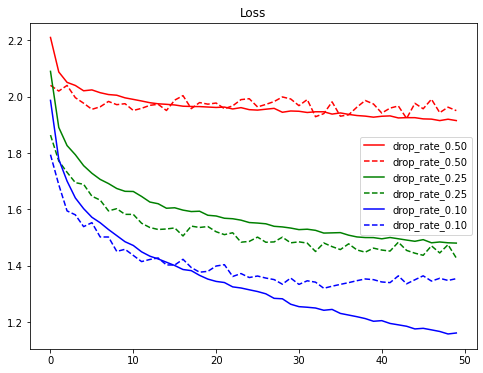

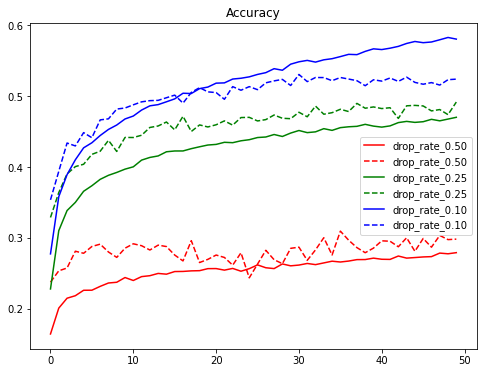

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()